Original shape: (1797, 64)
Reduced shape: (1797, 4)
Explained variance ratio: [0.14890594 0.13618771 0.11794594 0.08409979]


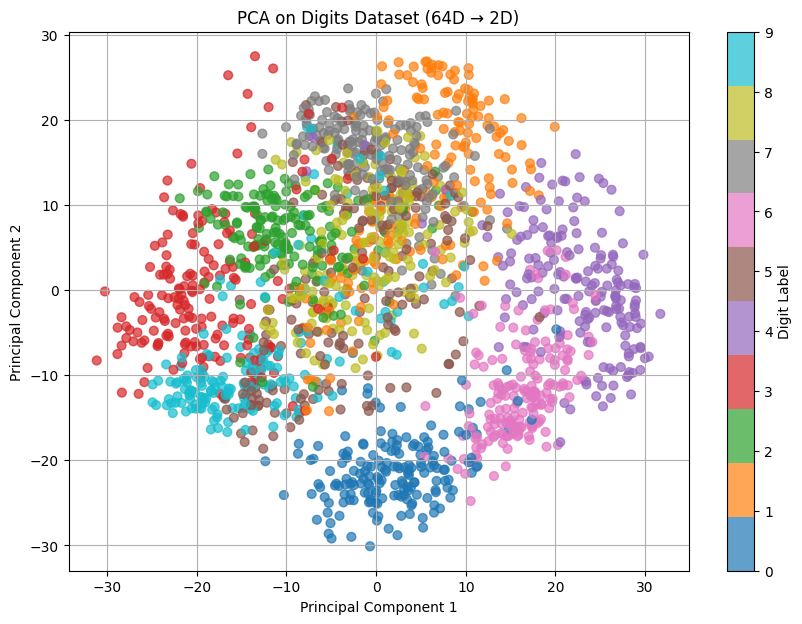

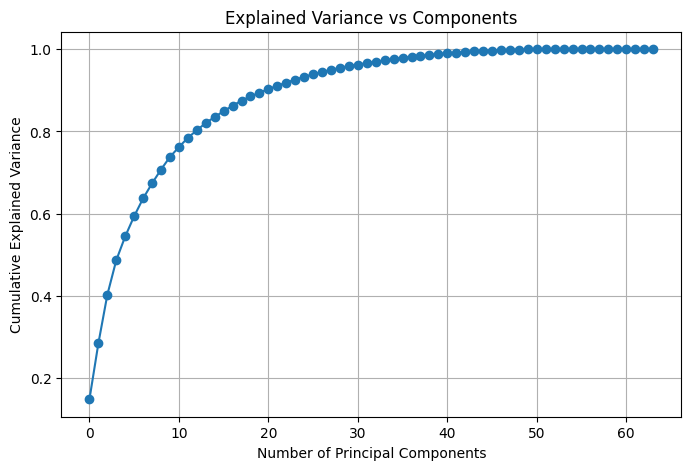

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
 #------------------------------
# Step 1: Load Dataset
 #------------------------------
digits = load_digits()
X = digits.data # (1797, 64) features (8x8 pixel images flattened)
y = digits.target # digit labels (0–9)
print("Original shape:", X.shape)
 #------------------------------
# Step 2: Apply PCA
 #------------------------------
pca = PCA(n_components=4) # reduce to 2D
X_pca = pca.fit_transform(X)
print("Reduced shape:", X_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)
 #------------------------------
# Step 3: Visualization (2D scatter plot)
 #------------------------------
plt.figure(figsize=(10,7))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1],
c=y, cmap="tab10", alpha=0.7, s=40)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Digits Dataset (64D → 2D)")
plt.colorbar(scatter, label="Digit Label")
plt.grid(True)
plt.show()
 #------------------------------
# Step 4: Variance Explained Plot (Scree plot)
 #------------------------------
pca_full = PCA().fit(X) # PCA with all components
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Components")
plt.grid(True)
plt.show()

## Explanation of the PCA Notebook Code

Here's a breakdown of the code, line by line, explaining the purpose and arguments of each step.

**1. Imports**

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
```

*   `import numpy as np`: Imports the NumPy library, which provides support for numerical operations, especially for working with arrays.  The alias `np` is used for brevity.
*   `import matplotlib.pyplot as plt`: Imports the `pyplot` module from the Matplotlib library, which is used for creating visualizations like plots and charts. The alias `plt` is commonly used.
*   `from sklearn.decomposition import PCA`: Imports the `PCA` class from the `sklearn.decomposition` module. `PCA` is the Principal Component Analysis class, used for dimensionality reduction.
*   `from sklearn.datasets import load_digits`: Imports the `load_digits` function from the `sklearn.datasets` module. This function loads a dataset of handwritten digits (0-9).

**2. Load Dataset**

```python
#------------------------------
# Step 1: Load Dataset
#------------------------------
digits = load_digits()
X = digits.data # (1797, 64) features (8x8 pixel images flattened)
y = digits.target # digit labels (0–9)
print("Original shape:", X.shape)
```

*   `digits = load_digits()`: Loads the digits dataset using the `load_digits()` function.  The returned object `digits` is a dictionary-like object containing the data and metadata.
*   `X = digits.data`: Assigns the data (features) from the `digits` object to the variable `X`. `X` will be a NumPy array of shape (1797, 64).  Each row represents a digit image, and each column represents a pixel value (8x8 = 64 pixels).
*   `y = digits.target`: Assigns the target labels (the actual digit each image represents) from the `digits` object to the variable `y`. `y` will be a NumPy array of shape (1797,).
*   `print("Original shape:", X.shape)`: Prints the shape of the original data matrix `X`. This will output `Original shape: (1797, 64)`.

**3. Apply PCA**

```python
#------------------------------
# Step 2: Apply PCA
#------------------------------
pca = PCA(n_components=2) # reduce to 2D
X_pca = pca.fit_transform(X)
print("Reduced shape:", X_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)
```

*   `pca = PCA(n_components=2)`: Creates a `PCA` object, initializing it to reduce the data to 2 principal components.  The `n_components` argument specifies the desired number of dimensions after reduction.
*   `X_pca = pca.fit_transform(X)`: Fits the PCA model to the data `X` and then transforms `X` into the lower-dimensional space.  `fit()` learns the principal components from the data, and `transform()` applies the dimensionality reduction.  The result `X_pca` is a NumPy array of shape (1797, 2).
*   `print("Reduced shape:", X_pca.shape)`: Prints the shape of the reduced data matrix `X_pca`. This will output `Reduced shape: (1797, 2)`.
*   `print("Explained variance ratio:", pca.explained_variance_ratio_)`: Prints the explained variance ratio for each of the selected principal components.  This indicates how much variance in the original data is explained by each component.  The output will be an array of two values, e.g., `[0.1490... 0.1373...]`.

**4. Visualization (2D scatter plot)**

```python
#------------------------------
# Step 3: Visualization (2D scatter plot)
#------------------------------
plt.figure(figsize=(10,7))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1],
c=y, cmap="tab10", alpha=0.7, s=40)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Digits Dataset (64D → 2D)")
plt.colorbar(scatter, label="Digit Label")
plt.grid(True)
plt.show()
```

*   `plt.figure(figsize=(10,7))`: Creates a new Matplotlib figure with a specified size (width=10 inches, height=7 inches).
*   `scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="tab10", alpha=0.7, s=40)`: Creates a scatter plot:
    *   `X_pca[:,0]`:  x-coordinates of the points (first principal component).
    *   `X_pca[:,1]`:  y-coordinates of the points (second principal component).
    *   `c=y`:  Colors the points according to the digit labels (`y`).
    *   `cmap="tab10"`:  Specifies the colormap to use ("tab10" is a discrete colormap with 10 distinct colors).
    *   `alpha=0.7`:  Sets the transparency of the points to 0.7.
    *   `s=40`: Sets the size of the points to 40.
*   `plt.xlabel("Principal Component 1")`: Sets the label for the x-axis.
*   `plt.ylabel("Principal Component 2")`: Sets the label for the y-axis.
*   `plt.title("PCA on Digits Dataset (64D → 2D)")`: Sets the title of the plot.
*   `plt.colorbar(scatter, label="Digit Label")`: Adds a colorbar to the plot, showing the mapping between colors and digit labels.
*   `plt.grid(True)`:  Adds a grid to the plot.
*   `plt.show()`:  Displays the plot.

**5. Variance Explained Plot (Scree plot)**

```python
#------------------------------
# Step 4: Variance Explained Plot (Scree plot)
#------------------------------
pca_full = PCA().fit(X) # PCA with all components
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Components")
plt.grid(True)
plt.show()
```

*   `pca_full = PCA().fit(X)`: Creates another `PCA` object, this time without specifying `n_components`. This means that PCA will calculate all possible components. Then, it fits the PCA model to the data `X`.
*   `plt.figure(figsize=(8,5))`: Creates a new Matplotlib figure with a specified size (width=8 inches, height=5 inches).
*   `plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')`: Creates a line plot:
    *   `pca_full.explained_variance_ratio_`: Contains the explained variance ratio for each principal component.
    *   `np.cumsum(...)`: Calculates the cumulative sum of the explained variance ratios. This shows the total variance explained as you add more components.
    *   `marker='o'`: Specifies that each data point should be marked with a circle.
*   `plt.xlabel("Number of Principal Components")`: Sets the label for the x-axis.
*   `plt.ylabel("Cumulative Explained Variance")`: Sets the label for the y-axis.
*   `plt.title("Explained Variance vs Components")`: Sets the title of the plot.
*   `plt.grid(True)`: Adds a grid to the plot.
*   `plt.show()`: Displays the plot. This plot is a scree plot, which helps in determining the optimal number of principal components to retain.

You're absolutely right about the purpose of both plots! Let me clarify what "variance ratio" means and confirm your understanding.

## **What is Variance Ratio?**

**Variance ratio** (or explained variance ratio) measures **how much of the original data's variability each principal component captures**.

Think of it this way:
- **Variance** = how much the data points spread out or differ from each other
- In the original 64D space, there's a total amount of "variation" across all pixel positions
- Each principal component captures a portion of this total variation
- **Variance ratio** = (variance captured by this component) / (total variance in original data)

**Example:**
- If PC1 has variance ratio = 0.15, it means PC1 alone captures 15% of all the variation in the original 64-dimensional data
- If PC2 has variance ratio = 0.13, it captures an additional 13%
- Together, PC1 + PC2 capture 28% of the total variation

**Why this matters:**
- Higher variance ratio = more important component = captures more of the "signal"
- Lower variance ratio = less important = captures more of the "noise"

## **Your Understanding is Correct!**

Yes, you've got it exactly right:

### **Scatter Plot (2D PCA Visualization):**
- Shows clustering patterns of all 1,797 digit images
- Each point = one handwritten digit image
- Colors help you see if similar digits (same number) cluster together
- Good clustering means PCA preserved the important differences between digit types

### **Scree Plot (Cumulative Explained Variance):**
- Tells you how many components you need to retain maximum information
- Helps you decide the trade-off between:
  - **Fewer components** = simpler, faster processing, but some information lost
  - **More components** = more information retained, but higher dimensionality

**Practical decision making:**
- If you see the curve flattening after 10 components at 85% variance explained, you might choose 10 components instead of all 64
- For digit recognition, you want enough variance explained to distinguish between different digits reliably

**The key insight:** The scatter plot shows you *what* the clustering looks like with just 2 components, while the scree plot shows you *whether* 2 components are enough or if you need more for better digit classification.

Your understanding is spot-on! The two plots work together to help you make informed decisions about dimensionality reduction for digit recognition tasks.